# Exercício 1 - PMR3508
## Classificador KNN para a base *Costa Rican Household Poverty Level Prediction*

### Parte 1: Limpando os dados

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
train_data = pd.read_csv('train.csv', 
                         index_col='Id', 
                         na_values='NaN', 
                         engine='python', 
                         sep=r'\s*,\s*')

In [42]:
train_data.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
Id,,,,,,,,,,,,,,,,,,,,,
ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [43]:
train_data.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


Conferindo campos numéricos e não-numéricos:

In [44]:
train_data.dtypes

v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
v18q1              float64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
rez_esc            float64
hhsize               int64
paredblolad          int64
paredzocalo          int64
paredpreb            int64
pareddes             int64
paredmad             int64
paredzinc            int64
paredfibras          int64
paredother           int64
                    ...   
bedrooms             int64
overcrowding       float64
tipovivi1            int64
tipovivi2            int64
tipovivi3            int64
tipovivi4            int64
t

In [45]:
train_data.shape

(9557, 142)

Conferindo quais campos possuem valores nulos:

In [46]:
train_data.isnull().any()

v2a1                True
hacdor             False
rooms              False
hacapo             False
v14a               False
refrig             False
v18q               False
v18q1               True
r4h1               False
r4h2               False
r4h3               False
r4m1               False
r4m2               False
r4m3               False
r4t1               False
r4t2               False
r4t3               False
tamhog             False
tamviv             False
escolari           False
rez_esc             True
hhsize             False
paredblolad        False
paredzocalo        False
paredpreb          False
pareddes           False
paredmad           False
paredzinc          False
paredfibras        False
paredother         False
                   ...  
bedrooms           False
overcrowding       False
tipovivi1          False
tipovivi2          False
tipovivi3          False
tipovivi4          False
tipovivi5          False
computer           False
television         False


In [47]:
train_data.dropna().shape

(156, 142)

Ou seja, há muitas linhas com valores nulos, de modo que removendo todas elas, o *dataset* fica muito pequeno. No entanto, todos os parâmetros da base são numéricos, de modo que é valido substituir os valores nulos com **zeros**.

In [48]:
train_data = train_data.fillna(value=0)

Realizando o mesmo procedimento para a base de teste:

In [50]:
test_data = pd.read_csv('test.csv', 
                         index_col='Id', 
                         na_values='NaN', 
                         engine='python', 
                         sep=r'\s*,\s*')

In [51]:
test_data.shape

(23856, 141)

In [52]:
test_data.dropna().shape

(448, 141)

In [53]:
test_data = test_data.fillna(value=0)

### Parte 2: Explorando os dados

Será feita uma análise de correlação entre os atributos para escolher os mais relevantes:

In [55]:
train_data.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
Id,,,,,,,,,,,,,,,,,,,,,
ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [59]:
analise = train_data.corr().loc[:,'Target'].sort_values(ascending=True)
analise

hogar_nin         -0.328199
r4t1              -0.316745
SQBhogar_nin      -0.311186
overcrowding      -0.289110
SQBovercrowding   -0.258744
r4m1              -0.253163
r4h1              -0.229889
eviv1             -0.208038
pisocemento       -0.205439
epared1           -0.203025
hacdor            -0.191714
etecho1           -0.190837
eviv2             -0.179421
epared2           -0.177334
r4m3              -0.173931
paredmad          -0.168237
energcocinar4     -0.162366
instlevel2        -0.159210
tamviv            -0.158224
instlevel1        -0.147883
tamhog            -0.147642
hhsize            -0.147642
hogar_total       -0.147642
r4t3              -0.147548
SQBhogar_total    -0.143900
elimbasu3         -0.140924
etecho2           -0.139205
hacapo            -0.138008
estadocivil1      -0.135651
tipovivi4         -0.117094
                     ...   
age                0.117620
refrig             0.126792
estadocivil3       0.129730
tipovivi2          0.143891
energcocinar2      0

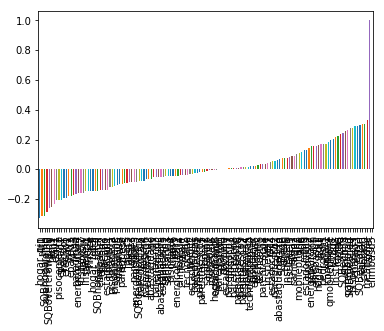

In [60]:
analise.plot(kind='bar')

### Parte 3: Seleção de Atributos

Selecionando os atributos com o módulo da correlação maior que 0.10:

In [64]:
analise = train_data.corr().loc[:,'Target'].sort_values(ascending=True).where(lambda x : abs(x) > 0.10).dropna()
analise

hogar_nin         -0.328199
r4t1              -0.316745
SQBhogar_nin      -0.311186
overcrowding      -0.289110
SQBovercrowding   -0.258744
r4m1              -0.253163
r4h1              -0.229889
eviv1             -0.208038
pisocemento       -0.205439
epared1           -0.203025
hacdor            -0.191714
etecho1           -0.190837
eviv2             -0.179421
epared2           -0.177334
r4m3              -0.173931
paredmad          -0.168237
energcocinar4     -0.162366
instlevel2        -0.159210
tamviv            -0.158224
instlevel1        -0.147883
tamhog            -0.147642
hhsize            -0.147642
hogar_total       -0.147642
r4t3              -0.147548
SQBhogar_total    -0.143900
elimbasu3         -0.140924
etecho2           -0.139205
hacapo            -0.138008
estadocivil1      -0.135651
tipovivi4         -0.117094
                     ...   
mobilephone        0.106421
age                0.117620
refrig             0.126792
estadocivil3       0.129730
tipovivi2          0

In [81]:
campos = analise.keys().tolist()
campos.remove('Target')

In [83]:
Xtrain_data = train_data[campos]
Ytrain_data = train_data.Target
Xtest_data = test_data[campos]

### Parte 4: Model Fitting

Primeira tentativa, sem otimização do classificador:

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [88]:
knn = KNeighborsClassifier(n_neighbors=3)

In [89]:
scores = cross_val_score(knn, Xtrain_data, Ytrain_data, cv=10)

In [91]:
scores.mean()

0.5474128220605181

Aplicando *GridSearchCV* e *Cross Validation* para otimizar a seleção de hiperparâmetros:

In [92]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1,50))
weights = ['uniform', 'distance']
p_range = list(range(1,3))
param = dict(n_neighbors=k_range, p=p_range)

knn = KNeighborsClassifier(n_neighbors=3)
grid = GridSearchCV(knn, param, cv=10, scoring='accuracy', n_jobs = -2)
grid.fit(Xtrain_data, Ytrain_data)
print(grid.best_estimator_)
print(grid.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=49, p=1,
           weights='uniform')
0.6391126922674479


In [93]:
knn_final = grid.best_estimator_
knn_final.fit(Xtrain_data,Ytrain_data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=49, p=1,
           weights='uniform')

In [94]:
Ytest_data = knn_final.predict(Xtest_data)

In [112]:
prediction = Ytest_data

In [113]:
prediction

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [114]:
Id = test_data.index.values
Id

array(['ID_2f6873615', 'ID_1c78846d2', 'ID_e5442cf6a', ...,
       'ID_07dbb4be2', 'ID_34d2ed046', 'ID_34754556f'], dtype=object)

In [116]:
s = { 'Id' : Id, 'Target' : prediction.astype(int) }
submission = pd.DataFrame(s)
submission

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4
5,ID_e77d38d45,4
6,ID_3c5f4bd51,4
7,ID_a849c29bd,4
8,ID_472fa82da,4
9,ID_24864adcc,4


In [117]:
submission.to_csv("submission.csv")